In [142]:
pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\admin\anaconda3\lib\site-packages (20.1.1)
Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install soynlp

Note: you may need to restart the kernel to use updated packages.


In [145]:
pip install krwordrank

Note: you may need to restart the kernel to use updated packages.


In [146]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [147]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [148]:
pip install soyclustering

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 전처리

In [150]:
f = open('C:/Users/admin/Desktop/yes24/information/stopwords.txt','r',encoding='utf-8')
stopwords = []
for line in f.readlines():
    stopwords.append(line.rstrip())
f.close()

In [151]:
file = open('C:/Users/admin/Desktop/yes24/data/177/652.txt','r',encoding='utf-8')
raw_txt = file.readlines()
file.close()

In [152]:
from soynlp.normalizer import *

In [153]:
sentences = []
    
for line in raw_txt:
    line = only_hangle_number(line)
    if len(line)==0:
        del(line)
    else:
        sentences.append(line)

In [154]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

token_han = []    
    
for sentence in sentences:
    word_tokens = okt.morphs(sentence)
    word_tokens = [word for word in word_tokens if not word in stopwords] # 불용어 제거
    token_han.append(word_tokens)

sent_han = []

for i in range(len(token_han)):
    sent_han.append(' '.join(token_han[i]))

In [134]:
from konlpy.tag import Okt
okt = Okt()

token_okt = []    
    
for sentence in sentences:
    word_tokens = okt.morphs(sentence)
    word_tokens = [word for word in word_tokens if not word in stopwords] # 불용어 제거
    token_okt.append(word_tokens)

sent_okt = []

for i in range(len(token_okt)):
    sent_okt.append(' '.join(token_okt[i]))

In [169]:
from soynlp.noun import LRNounExtractor_v2

noun_extractor = LRNounExtractor_v2(verbose=True)
prince = noun_extractor.train_extract(sentences)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 4597 from 968 sents. mem=0.477 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=11721, mem=0.480 Gb
[Noun Extractor] batch prediction was completed for 1536 words
[Noun Extractor] checked compounds. discovered 7 compounds
[Noun Extractor] postprocessing detaching_features : 536 -> 532
[Noun Extractor] postprocessing ignore_features : 532 -> 503
[Noun Extractor] postprocessing ignore_NJ : 503 -> 502
[Noun Extractor] 502 nouns (7 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.483 Gb                    
[Noun Extractor] 43.95 % eojeols are covered


In [170]:
from soynlp.tokenizer import LTokenizer
from soynlp.tokenizer import MaxScoreTokenizer
noun_scores = {word:score.score for word, score in prince.items()}
tokenizer = LTokenizer(scores=noun_scores)


token_LR = []
for sentence in sentences:
    temp_X = tokenizer.tokenize(sentence, flatten=True) # 토큰화
    token_LR.append(temp_X)
    

sent_LR = []

for i in range(len(token_LR)):
    sent_LR.append(' '.join(token_LR[i]))

In [157]:
sent_han

['어린 왕자',
 '초판 발행 2003년 07월 15일',
 '개정판 인쇄 2007년 06월 10일',
 '개정판 발행 2007년 06월 15일',
 '지은이 생텍쥐페리',
 '옮긴이 백은주',
 '펴낸이 김형호',
 '펴낸 곳 아름다운',
 '소 121 885 서울시 마포구 서교동 351 10 동 빌딩 103 호',
 '대표 전화 02 3142 8420',
 '팩시밀리 02 3143 4154',
 '출판 등록 1999년 11월 22일',
 '전자우편',
 '978 89 89354 77 2 03840',
 '본 전자책 한국 퍼브 제작 되었습니다',
 '전자책 저작권법 의하여 보호 받는 저작물 므 무단 재 무단 복제 금 합니다 이를 위반 시 형사 민사 상의 법적 책임 질 있습니다',
 '본 컨텐츠 은글꼴 사용 있습니다',
 '바치는 글',
 '레옹 베르트',
 '책 어른 바치 되어 어린이 대단히 미안한 마음 든다 그럴만 사정 첫 째 가까운 친구 어른 이라는 째 어른 모든 아들 있고 어린이 위 책 이해 째 어른 프랑스 고 있는데 굶주리며 떨고 어른 위로 필요',
 '모든 유로 부족하다만 어른 어린 시절 책 바치고자 어른 어린이였다 기억 어른 별로 없지만 바치는 글 고쳐 쓴다',
 '어린 시절 레옹 베르트',
 '원시림 관 이야기 담긴 험담 이라는 책 놀라운 그림 본 맹수 삼키는 보아 구렁이 그려진 그림이었다 왼쪽 그림 그림 베 껴 그린',
 '책 글 씌어',
 '보아 구렁이 먹이 씹지도 않고 통째 삼킨다 그러고는 먹이 소화 될 달 잠 잔다',
 '밀림 일어나는 여러 해보았다 그러고는 첫 그림 그리는 성공했다',
 '첫 그림',
 '그린 그림 어른 보여 주며 무섭지 않느냐고 물어보았다',
 '어른 대답',
 '모자 뭐 무섭다는',
 '그린 모자 아니었다 코끼리 소화 시키고 보아 구렁이 였다 어른 알아볼 있도록 보아 구렁이 뱃속 그려 보였다 어른 언제나 설명 해 주어 이해',
 '그림',
 '그림 본 어른 속이 보아 구렁이 집어치우고 지리 역사 수학 국어 공부 충고

In [158]:
sent_okt

['어린 왕자',
 '초판 발행 2003년 07월 15일',
 '개정판 인쇄 2007년 06월 10일',
 '개정판 발행 2007년 06월 15일',
 '지은이 생텍쥐페리',
 '옮긴이 백은주',
 '펴낸이 김형호',
 '펴낸 곳 아름다운',
 '소 121 885 서울시 마포구 서교동 351 10 동 빌딩 103 호',
 '대표 전화 02 3142 8420',
 '팩시밀리 02 3143 4154',
 '출판 등록 1999년 11월 22일',
 '전자우편',
 '978 89 89354 77 2 03840',
 '본 전자책 한국 퍼브 제작 되었습니다',
 '전자책 저작권법 의하여 보호 받는 저작물 므 무단 재 무단 복제 금 합니다 이를 위반 시 형사 민사 상의 법적 책임 질 있습니다',
 '본 컨텐츠 은글꼴 사용 있습니다',
 '바치는 글',
 '레옹 베르트',
 '책 어른 바치 되어 어린이 대단히 미안한 마음 든다 그럴만 사정 첫 째 가까운 친구 어른 이라는 째 어른 모든 아들 있고 어린이 위 책 이해 째 어른 프랑스 고 있는데 굶주리며 떨고 어른 위로 필요',
 '모든 유로 부족하다만 어른 어린 시절 책 바치고자 어른 어린이였다 기억 어른 별로 없지만 바치는 글 고쳐 쓴다',
 '어린 시절 레옹 베르트',
 '원시림 관 이야기 담긴 험담 이라는 책 놀라운 그림 본 맹수 삼키는 보아 구렁이 그려진 그림이었다 왼쪽 그림 그림 베 껴 그린',
 '책 글 씌어',
 '보아 구렁이 먹이 씹지도 않고 통째 삼킨다 그러고는 먹이 소화 될 달 잠 잔다',
 '밀림 일어나는 여러 해보았다 그러고는 첫 그림 그리는 성공했다',
 '첫 그림',
 '그린 그림 어른 보여 주며 무섭지 않느냐고 물어보았다',
 '어른 대답',
 '모자 뭐 무섭다는',
 '그린 모자 아니었다 코끼리 소화 시키고 보아 구렁이 였다 어른 알아볼 있도록 보아 구렁이 뱃속 그려 보였다 어른 언제나 설명 해 주어 이해',
 '그림',
 '그림 본 어른 속이 보아 구렁이 집어치우고 지리 역사 수학 국어 공부 충고

In [159]:
sent_LR

['어린 왕자',
 '초판 발행 2003년 07월 15일',
 '개정판 인쇄 2007년 06월 10 일',
 '개정판 발행 2007년 06월 15일',
 '지은이 생텍쥐페리',
 '옮긴이 백은주',
 '펴낸 이 김형호',
 '펴낸 곳 아름 다운날',
 '주 소 121 885 서울시 마포구 서교동 351 10 동보빌딩 10 3호',
 '대표전화 02 3142 8420',
 '팩시밀리 02 3143 4154',
 '출판등록 1999년 11월 22 일',
 '전자우편',
 '978 89 89354 77 2 03840',
 '본 전자책은 한국이퍼브에서 제작되었습니다',
 '이 전자책은 저작권법에 의하여 보호 를 받는 저작물이므로 무단전재와 무단복제를 금합니다 이를 위반시에는 형사 민사상의 법적책임을 질 수 있습니다',
 '본 컨텐츠는 은글꼴을 사용하고 있습니다',
 '바치는 글',
 '레옹 베르트에게',
 '이 책을 어른들 에게 바치게 되어 어린이들 에게는 대단 히 미안 한 마음 이 든다 나에게는 그럴만한 사정이 세 가지가 있다 첫 번째 는 나의 가장 가까운 친구 가 바로 어른들 이라는 점이다 두 번째 는 어른들 은 모든 것을 알아 들을 수 있고 어린이들 을 위한 책까지도 이해 할 수 있다는 점이다 세 번째 는 이 어른들 은 프랑스 에 살고 있는데 지금 굶주리며 떨고 있다는 사실 이다 따라서 어른들 은 위로 할 필요 가 있다',
 '그 모든 이유로도 부족 하다만 나는 이들 어른들 의 어린 시절 에 이 책을 바치고자 한다 어른들 도 처음 에는 누구나 어린이였다 물론 그것 을 기억 하는 어른 은 별로 없지만 그래서 나는 바치는 글을 이렇게 고쳐 쓴다',
 '어린 시절 의 레옹 베르트에게',
 '내가 여섯 살 때 원시림 에 관한 이야기 가 담긴 모험담 이라는 책에서 놀라운 그림 을 본 적이 있다 그것 은 맹수를 삼키는 보아구렁이 가 그려진 그림 이었다 왼쪽 그림 이 바로 그 그림 을 베껴 그린 것이다',
 '그 책에는 이런 글이 씌어 있었다',
 '보아구렁이 는 먹이를 씹

In [173]:
token_LR[:30]

[['어린', '왕자'],
 ['초판', '발행', '2003년', '07월', '15일'],
 ['개정판', '인쇄', '2007년', '06월', '10', '일'],
 ['개정판', '발행', '2007년', '06월', '15일'],
 ['지은이', '생텍쥐페리'],
 ['옮긴이', '백은주'],
 ['펴낸', '이', '김형호'],
 ['펴낸', '곳', '아름', '다운날'],
 ['주',
  '소',
  '121',
  '885',
  '서울시',
  '마포구',
  '서교동',
  '351',
  '10',
  '동보빌딩',
  '10',
  '3호'],
 ['대표전화', '02', '3142', '8420'],
 ['팩시밀리', '02', '3143', '4154'],
 ['출판등록', '1999년', '11월', '22', '일'],
 ['전자우편'],
 ['978', '89', '89354', '77', '2', '03840'],
 ['본', '전자책은', '한국이퍼브에서', '제작되었습니다'],
 ['이',
  '전자책은',
  '저작권법에',
  '의하여',
  '보호',
  '를',
  '받는',
  '저작물이므로',
  '무단전재와',
  '무단복제를',
  '금합니다',
  '이를',
  '위반시에는',
  '형사',
  '민사상의',
  '법적책임을',
  '질',
  '수',
  '있습니다'],
 ['본', '컨텐츠는', '은글꼴을', '사용하고', '있습니다'],
 ['바치는', '글'],
 ['레옹', '베르트에게'],
 ['이',
  '책을',
  '어른들',
  '에게',
  '바치게',
  '되어',
  '어린이들',
  '에게는',
  '대단',
  '히',
  '미안',
  '한',
  '마음',
  '이',
  '든다',
  '나에게는',
  '그럴만한',
  '사정이',
  '세',
  '가지가',
  '있다',
  '첫',
  '번째',
  '는',
  '나의',
  '가장',
  '가까운',
  '친구',
 

In [ ]:
from konlpy.tag import Okt
okt = Okt()

token_okt = []    
    
for sentence in sentences:
    word_tokens = okt.morphs(sentence)
    word_tokens = [word for word in word_tokens if not word in stopwords] # 불용어 제거
    token_okt.append(word_tokens)

##  Page Rank 기반

### KR Word Rank 

In [18]:
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(sent_LR, beta, max_iter)

scan vocabs ... 
num vocabs = 1143
done = 10


In [19]:
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

      어린:	18.9245
      왕자:	17.6485
     아저씨:	5.6413
     말했다:	4.7836
      대답:	4.4616
      별들:	3.2487
      그림:	3.0139
     어른들:	2.9847
     이야기:	2.5263
     물었다:	2.4453
      말을:	2.3422
      친구:	2.2841
      일이:	2.2715
      별을:	2.1159
      지리:	2.1149
      사막:	1.9714
      꽃은:	1.9643
      아니:	1.9405
      여우:	1.9072
      마음:	1.8167
      이해:	1.8166
     가로등:	1.8121
      사는:	1.8100
      지구:	1.7866
      명령:	1.7090
      모든:	1.7055
      저녁:	1.6887
      별에:	1.6851
      장미:	1.6780
      꽃이:	1.6612


In [20]:
from krwordrank.sentence import summarize_with_sentences

penalty = lambda x:0 if (30 <= len(x) <= 80) else 1

keywords, sents = summarize_with_sentences(
    sent_LR,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.5,
    num_keywords=100,
    num_keysents=30,
    scaling=lambda x:1,
    verbose=False,
)

In [21]:
sents

['별에는 술주정뱅이 살고 별을 방문한 짧았지만 어린 왕자 마음 몹시 우울 해졌다',
 '맨 지구 도착 어린 왕자 만날 없자 몹시 놀랐다 그는 별을 잘못 찾아 아닌지 겁이 모래 속에서 달빛 띤 고리 움직 였다',
 '아저씨 하면 좋겠어 별들 바라보는 모든 별들 녹슨 도르래 달린 우물 되어 내게 물을 먹여',
 '어린 왕자 별에도 끔찍한 식물 씨앗 있었으니 바오밥나무 씨앗 별은 바오밥나무 씨앗 투성이였던',
 '허영심 자만심에 가득 찬 꽃은 어린 왕자 당황 꽃은 가진 개의 가시 이야기 덧붙였다',
 '어린 왕자 진심으로 꽃을 아껴 주려 했으나 이내 의심을 되었다 어린 왕자 꽃이 사소한 말까지도 진지 받아들이는 바람 몹시 슬퍼 졌다',
 '어린 왕자 말하며 지리 학자의 별을 둘러보았다 멋진 별은 일찍이 본 적이',
 '어린 왕자 오랫동안 모래 바위 눈 위를 헤맨 끝에 마침내 길을 발견 길이란 사는 곳으로 통하게 되어 마련이다',
 '어린 왕자 갑자기 몹시 불행 들었다 그의 꽃은 세상 자기와 꽃은 없다고 말했었다 곳의 정원 에만도 그와 닮은 꽃들 5천 송이',
 '너도 별에 가서 장미꽃들 찬찬히 보렴 장미꽃 세상 송이 뿐이라는 걸 깨닫게 될 내게 돌아와서 작별 인사 하렴 네게 선물 비밀 알려줄',
 '양을 그려 보여 주었다 나의 어린 친구 너그럽게 봐준다는 생긋 웃으며 말했다',
 '어린 왕자 소행성 612 왔어 말한다면 어른들 묻지 않고도 이해 어른들 이란 그렇다고 어른들 나쁘게 아이들 어른들 너그럽게 이해 해 주어야',
 '이야기 알아 낸 양 덕택이었다 그날 어린 왕자 중대한 의문 발견 했다는 느닷없이 내게 물어 왔다',
 '어린 왕자 하품 저녁 노을을 보지 못하게 못내 아쉬웠다 지겨워지기 시작 왕에게 말했다',
 '별들 관리하지 별들 세어 보고 세어 보면서 말이다 힘든 일이지만 일을 해',
 '제대로 아는군 지리 학자는 탐험가 진실한 인지 먼저 알아 보고 그가 발견 조사 한단다',
 '꽃이 덧없는 것이라고 세상 맞서 스스로 지킬 것이라고는 개의 가시 밖에 없는

In [23]:
from krwordrank.word import summarize_with_keywords

keywords = summarize_with_keywords(sent_LR, min_count=5, max_length=10,
    beta=0.55, max_iter=10, stopwords=stopwords, verbose=True)

scan vocabs ... 
num vocabs = 1143
done = 7 Early stopped.


In [24]:
keywords

{'왕자': 9.926166434384095,
 '어린': 9.1114734500952,
 '아저씨': 4.086845186008601,
 '대답': 3.131815792828789,
 '말했다': 2.967751240270215,
 '어른들': 2.465183997966623,
 '별들': 2.4219852021263484,
 '그림': 2.4142532673415236,
 '이야기': 2.1144702958733044,
 '일이': 1.8362327716641482,
 '친구': 1.8233900811729569,
 '말을': 1.8108850489946275,
 '물었다': 1.76576874937926,
 '사막': 1.7617165649228417,
 '별을': 1.7243533600514969,
 '지리': 1.6451341814373752,
 '마음': 1.6107298393779366,
 '꽃은': 1.58246994172006,
 '장미': 1.556514429309388,
 '지구': 1.5541282083878325,
 '이해': 1.5501053707285581,
 '저녁': 1.5129309854996689,
 '모든': 1.505647787240993,
 '가로': 1.498502578838335,
 '명령': 1.4807239886273402,
 '별이': 1.4683780642918456,
 '별은': 1.457918102551825,
 '꽃이': 1.4335754743093139,
 '내게': 1.421094057040999,
 '사는': 1.4033393399124618,
 '세상': 1.3948649901542072,
 '여우': 1.3940848171250502,
 '소행성': 1.3329630905513166,
 '길을': 1.321328358100546,
 '별에': 1.317782299086938,
 '불을': 1.3054910878766282,
 '길들': 1.2897802530485443,
 '켜는': 1.28038

## LDA

In [175]:
import gensim

In [176]:
from gensim import corpora
dictionary = corpora.Dictionary(token_okt)
corpus = [dictionary.doc2bow(text) for text in token_okt]
print(corpus[1]) # 수행된 결과에서 두번째 문장 출력. 첫번째 문서의 인덱스는 0[:5]

[(2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [177]:
print(dictionary[100])
len(dictionary)

아들


3118

In [178]:
import gensim
NUM_TOPICS = 5 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.079*"어린" + 0.077*"왕자" + 0.018*"대답" + 0.014*"물었다" + 0.010*"양" + 0.008*"해" + 0.007*"어른" + 0.007*"그려" + 0.006*"인사" + 0.005*"여우"')
(1, '0.031*"왕자" + 0.031*"어린" + 0.028*"꽃" + 0.009*"별" + 0.008*"고" + 0.007*"사막" + 0.007*"장미꽃" + 0.006*"아저씨" + 0.006*"양" + 0.006*"물"')
(2, '0.039*"별" + 0.013*"가로등" + 0.011*"아저씨" + 0.010*"그림" + 0.008*"켜는" + 0.007*"곳" + 0.006*"여우" + 0.006*"친구" + 0.005*"요" + 0.005*"꽃"')
(3, '0.015*"어린" + 0.013*"왕자" + 0.013*"별" + 0.010*"바오밥나무" + 0.010*"왕" + 0.010*"꽃" + 0.008*"곳" + 0.008*"못" + 0.006*"해" + 0.006*"지구"')
(4, '0.017*"아저씨" + 0.012*"안녕" + 0.011*"어른" + 0.009*"별" + 0.007*"뭐" + 0.007*"고" + 0.006*"해" + 0.006*"니" + 0.006*"서" + 0.006*"일이"')


In [179]:
print(ldamodel.print_topics())

[(0, '0.079*"어린" + 0.077*"왕자" + 0.018*"대답" + 0.014*"물었다" + 0.010*"양" + 0.008*"해" + 0.007*"어른" + 0.007*"그려" + 0.006*"인사" + 0.005*"여우"'), (1, '0.031*"왕자" + 0.031*"어린" + 0.028*"꽃" + 0.009*"별" + 0.008*"고" + 0.007*"사막" + 0.007*"장미꽃" + 0.006*"아저씨" + 0.006*"양" + 0.006*"물"'), (2, '0.039*"별" + 0.013*"가로등" + 0.011*"아저씨" + 0.010*"그림" + 0.008*"켜는" + 0.007*"곳" + 0.006*"여우" + 0.006*"친구" + 0.005*"요" + 0.005*"꽃"'), (3, '0.015*"어린" + 0.013*"왕자" + 0.013*"별" + 0.010*"바오밥나무" + 0.010*"왕" + 0.010*"꽃" + 0.008*"곳" + 0.008*"못" + 0.006*"해" + 0.006*"지구"'), (4, '0.017*"아저씨" + 0.012*"안녕" + 0.011*"어른" + 0.009*"별" + 0.007*"뭐" + 0.007*"고" + 0.006*"해" + 0.006*"니" + 0.006*"서" + 0.006*"일이"')]


In [180]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\admin\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [181]:
import re
import operator

In [33]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from pprint import pprint

%matplotlib inline

In [39]:
bigram = gensim.models.Phrases(token_okt)
bigram

In [40]:
dictionary = Dictionary(token_okt)
corpus = [dictionary.doc2bow(text) for text in token_okt]

In [51]:
corpus

[[(0, 1), (1, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(3, 1), (5, 1), (7, 1), (9, 1), (10, 1)],
 [(12, 1), (13, 1)],
 [(14, 1), (15, 1)],
 [(16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1)],
 [(21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(33, 1), (34, 1), (35, 1), (36, 1), (37, 1)],
 [(33, 1), (38, 1), (39, 1), (40, 1)],
 [(41, 1), (42, 1), (43, 1), (44, 1), (45, 1)],
 [(46, 1)],
 [(47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)],
 [(53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)],
 [(55, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1)],
 [(54, 1), (72, 1), (80, 1), (81, 1), (82, 1)],
 [(83, 1), (84, 1)],
 [(85, 1), (86, 1)],
 [(87, 1),
  (88, 1),
  (89, 

### lsi model

In [41]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [42]:
lsimodel.show_topics(num_topics=10)  # Showing only the top 5 topics

[(0,
  '0.677*"어린" + 0.667*"왕자" + 0.165*"별" + 0.109*"꽃" + 0.063*"해" + 0.051*"물었다" + 0.050*"고" + 0.045*"곳" + 0.042*"대답" + 0.040*"물"'),
 (1,
  '-0.782*"별" + -0.369*"아저씨" + -0.260*"꽃" + 0.160*"어린" + 0.156*"왕자" + -0.133*"고" + -0.095*"해" + -0.079*"니까" + -0.073*"가로등" + -0.064*"친구"'),
 (2,
  '0.848*"꽃" + -0.259*"별" + -0.194*"아저씨" + 0.101*"양" + 0.095*"세상" + 0.094*"송이" + 0.090*"고" + 0.076*"가시" + 0.075*"일이" + 0.065*"꽃잎"'),
 (3,
  '-0.537*"아저씨" + 0.337*"별" + 0.287*"가로등" + -0.283*"친구" + -0.261*"어른" + -0.230*"해" + 0.188*"켜는" + -0.141*"고" + -0.113*"못" + -0.092*"화산"'),
 (4,
  '-0.454*"어른" + -0.334*"가로등" + -0.249*"켜는" + 0.244*"아저씨" + -0.201*"곳" + -0.177*"해" + -0.170*"이야기" + -0.160*"고" + -0.158*"그림" + -0.126*"에다"'),
 (5,
  '-0.569*"에다" + -0.565*"더하면" + -0.321*"열" + -0.317*"스물" + 0.108*"어른" + -0.102*"아저씨" + -0.093*"1" + -0.093*"백" + -0.093*"5억" + -0.083*"2만"'),
 (6,
  '0.462*"가로등" + 0.429*"아저씨" + 0.345*"켜는" + -0.265*"별" + -0.259*"어른" + 0.157*"무대" + 0.112*"곳" + -0.112*"고" + 0.105*"나왔다" + 0.094*"보면"'),
 (

In [43]:
lsitopics = lsimodel.show_topics(formatted=False)

### hdp model

In [182]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

C:\Users\admin\Anaconda3\lib\site-packages\gensim\models\hdpmodel.py:467: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  start_time = time.clock()


In [183]:
hdpmodel.show_topics()

[(0,
  '0.002*이라고 + 0.002*뒤 + 0.002*맞추어 + 0.002*함부로 + 0.002*사라져 + 0.002*되니까 + 0.002*기다리다니 + 0.002*안았다 + 0.002*탐험가 + 0.002*인쇄 + 0.002*얼굴 + 0.002*라는 + 0.002*위대한 + 0.002*덧붙여 + 0.002*뜨 + 0.002*쓴단다 + 0.002*드문 + 0.002*주시 + 0.002*화산 + 0.002*2003년'),
 (1,
  '0.003*들이란다 + 0.002*소화 + 0.002*3142 + 0.002*주저앉았다 + 0.002*괜찮아 + 0.002*백만이 + 0.002*짜야 + 0.002*공손하게 + 0.002*국제 + 0.002*있지요 + 0.002*만으로도 + 0.002*생겨났냐고 + 0.002*즐길 + 0.002*봤는데 + 0.002*물어보았지만 + 0.002*만년필 + 0.002*지붕 + 0.002*물음 + 0.002*충실히 + 0.002*크기'),
 (2,
  '0.003*여드레 + 0.002*어렸을 + 0.002*밝힌 + 0.002*이냐 + 0.002*다다른 + 0.002*외쳤다 + 0.002*양심 + 0.002*불러 + 0.002*했는데 + 0.002*땅 + 0.002*별 + 0.002*되도록 + 0.002*맞이 + 0.002*떠날 + 0.002*이랑은 + 0.002*가야겠습니다 + 0.002*돌아오는데 + 0.002*불복 + 0.002*물어볼 + 0.002*마음속'),
 (3,
  '0.003*이르러 + 0.003*두었지만 + 0.002*작고 + 0.002*멀었다는 + 0.002*도착 + 0.002*끔찍한 + 0.002*벌어졌을까 + 0.002*이네 + 0.002*되었어 + 0.002*외 + 0.002*넥타이 + 0.002*지리학 + 0.002*쳐 + 0.002*해도 + 0.002*바뀌지 + 0.002*들인단다 + 0.002*3143 + 0.002*통해 + 0.002*이마 + 0.002*보았지만'),
 (4,
  '0.003*부

In [184]:
hdptopics = hdpmodel.show_topics(formatted=False)

In [34]:
def make_topictable_per_doc(ldamodel, corpus, texts):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [84]:
topictable = make_topictable_per_doc(ldamodel, corpus, token_okt)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,1.0,0.7327,"[(0, 0.06667632), (1, 0.7327355), (2, 0.066667..."
1,1,4.0,0.8663,"[(0, 0.033362307), (1, 0.033579163), (2, 0.033..."
2,2,1.0,0.8666,"[(0, 0.03336492), (1, 0.86656207), (2, 0.03336..."
3,3,1.0,0.8659,"[(0, 0.03336479), (1, 0.86588866), (2, 0.03336..."
4,4,4.0,0.7331,"[(0, 0.066727534), (1, 0.06670289), (2, 0.0667..."
5,5,3.0,0.7332,"[(0, 0.06670263), (1, 0.066688105), (2, 0.0666..."
6,6,2.0,0.7332,"[(0, 0.066698276), (1, 0.06668552), (2, 0.7332..."
7,7,3.0,0.5078,"[(0, 0.040206816), (1, 0.37140602), (2, 0.0402..."
8,8,3.0,0.9384,"[(0, 0.015395549), (1, 0.015391404), (2, 0.015..."
9,9,3.0,0.8664,"[(0, 0.033357263), (1, 0.033348013), (2, 0.033..."


### K-means

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans


vectorizer = CountVectorizer()
x = vectorizer.fit_transform(full_LR)

In [97]:
x.shape

(8130, 3367)

In [98]:
from sklearn.metrics import pairwise_distances
from numpy.random import permutation
from numpy import histogram

sample_idx = permutation(x.shape[0])[:1000]
dist = pairwise_distances(x, x[sample_idx,:], metric='cosine')
hist, bin_edges = histogram(dist, bins=20)

In [99]:
dist

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [100]:
# training k-means
kmeans = KMeans(n_clusters=100).fit(x)

# trained labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [101]:
from soyclustering import SphericalKMeans
spherical_kmeans = SphericalKMeans(
    n_clusters=100,
    max_iter=10,
    verbose=1,
    init='similar_cut',
    sparsity='minimum_df',
    minimum_df_factor=0.05
)

In [102]:
labels = spherical_kmeans.fit_predict(x)

initialization_time=0.250330 sec, sparsity=0.000294
n_iter=1, changed=1232, inertia=6898.000, iter_time=0.044 sec, sparsity=0.01
n_iter=2, changed=0, inertia=6694.101, iter_time=0.042 sec, sparsity=0.01
Early converged.


In [103]:
from soyclustering import proportion_keywords

vocabs = [vocab for vocab, idx in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])]
centers = kmeans.cluster_centers_

keywords = proportion_keywords(
    centers,
    labels=labels,
    index2word=vocabs)

In [104]:
keywords

[[('잡고', 1.0)],
 [('대답', 1.0)],
 [('안녕', 1.0),
  ('명령', 1.0),
  ('꽃이', 1.0),
  ('세상', 1.0),
  ('일을', 1.0),
  ('가시', 1.0),
  ('꽃들', 1.0),
  ('보고', 1.0),
  ('송이', 1.0),
  ('불을', 1.0),
  ('알아', 1.0),
  ('양을', 1.0),
  ('장미꽃', 1.0),
  ('되었다', 1.0),
  ('몹시', 1.0),
  ('보이지', 1.0),
  ('양이', 1.0),
  ('지나', 1.0),
  ('허영심', 1.0),
  ('가는', 1.0),
  ('사랑', 1.0),
  ('얼굴', 1.0),
  ('길을', 1.0),
  ('노을을', 1.0),
  ('되는', 1.0),
  ('말이다', 1.0),
  ('별이', 1.0),
  ('술주정뱅이', 1.0),
  ('아니야', 1.0),
  ('왕이', 1.0),
  ('그의', 1.0),
  ('눈에', 1.0),
  ('모래', 1.0),
  ('뱀이', 1.0),
  ('아니라', 1.0),
  ('앉아', 1.0),
  ('거예요', 1.0),
  ('더하면', 1.0),
  ('바라보았다', 1.0),
  ('소행성', 1.0),
  ('있어요', 1.0),
  ('잘못', 1.0),
  ('장미꽃들', 1.0),
  ('재미', 1.0),
  ('질문', 1.0),
  ('필요', 1.0),
  ('행복', 1.0),
  ('거지', 1.0),
  ('걸어', 1.0),
  ('그가', 1.0),
  ('그날', 1.0),
  ('덧붙였다', 1.0),
  ('도르래', 1.0),
  ('들이', 1.0),
  ('떨어진', 1.0),
  ('멋진', 1.0),
  ('명의', 1.0),
  ('모습', 1.0),
  ('목소리', 1.0),
  ('숭배', 1.0),
  ('아이들', 1.0),
  ('않고', 1.0),
  ('오늘', 1.0

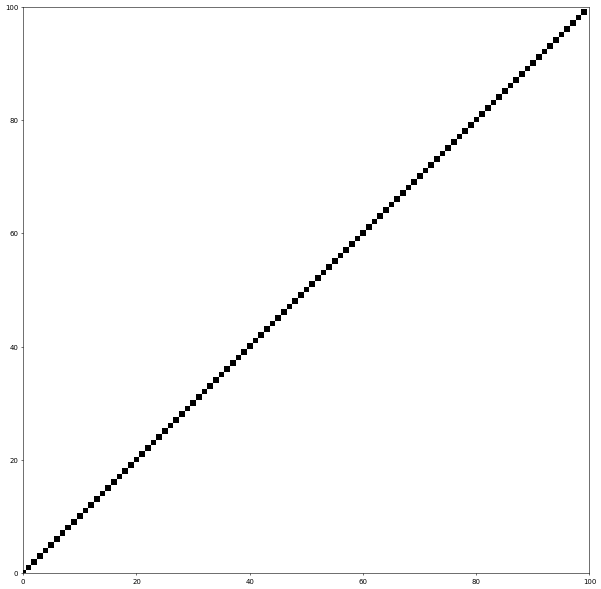

In [105]:
from soyclustering import visualize_pairwise_distance

# visualize pairwise distance matrix
fig = visualize_pairwise_distance(centers, max_dist=.7, sort=True)